In [1]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import processing_netcdf as pcdf
import geopandas as gpd
from geopandas import GeoDataFrame
import shapely.geometry 
import numpy as np
from shapely import geometry as gmty
from geofeather import to_geofeather, from_geofeather
import glob
import os
import pyarrow
from xclim import ensembles as ens
from xclim import subset
import matplotlib.pyplot as plt

In [2]:
folder = "/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/"

# Select and open Region (Shapefile)

In [16]:
######Select Region by uncommenting
#region = 'DDE_STF_20K_REG_FOR_VUE_S'
# region = 'DDE_STF_20K_UA_PER_VUE_S'
region = 'DOM_BIO'
# region = 'REG_ECO'
# region = 'SDOM_BIO'
# region = 'Secteurs_Operations_Regionales'
# region = 'SREG_ECO'
# region = 'territoire_guide

In [17]:
shapefile = ("/home/mlopez/EXEC/Shapefiles/"+region+".shp")
poly = gpd.read_file(shapefile)
poly= poly.to_crs('epsg:4326')
poly

,OBJECTID,ZONE_VEG,SZONE_VEG,DOM_BIO,NOM,SUPERFICIE,Shape_Leng,Shape_Area,TemMax,geometry
0,1,None,None,None,None,25607428.6,164.992897,35.988962,None,"POLYGON ((-57.10894 51.41622, -57.10843 51.425..."
1,2,Z2,Z21,6,Pessière à mousses,2703332.1,19.934361,3.614118,None,"POLYGON ((-57.10885 51.80453, -57.10871 51.894..."
2,3,Z2,Z22,7,Pessière à lichens,146331.8,3.433543,0.197042,None,"POLYGON ((-63.62106 52.87605, -63.61877 52.885..."
3,4,Z2,Z22,7,Pessière à lichens,297815.4,7.177941,0.397690,None,"POLYGON ((-64.00001 52.73757, -63.99938 52.732..."
4,5,Z3,Z31,9,Toundra arctique arbustive,19449981.6,83.116253,30.841645,None,"POLYGON ((-69.59218 60.21848, -69.59202 60.214..."
...,...,...,...,...,...,...,...,...,...,...
1287,1288,Z2,Z22,7,Pessière à lichens,29016262.2,60.028484,40.552338,None,"POLYGON ((-66.93699 57.86419, -66.88774 57.855..."
1288,1289,Z2,Z23,8,Toundra forestière,629112.4,6.975767,0.894753,None,"POLYGON ((-67.48167 55.28456, -67.40291 55.279..."
1289,1290,Z2,Z23,8,Toundra forestière,20713843.3,54.337240,30.710562,None,"POLYGON ((-69.92814 58.55252, -69.88419 58.547..."
1290,1291,Z3,Z31,10,Toundra arctique herbacée,35894.8,1.755321,0.050682,None,"POLYGON ((-79.23661 54.79864, -79.25587 54.784..."


## Import dataframe with polygons

In [14]:
#dfpolyshape = from_geofeather('/home/mlopez/EXEC/Grids-polygons-regions/Grid-'+region+'.feather')
dfpolyshape = from_geofeather('/home/mlopez/EXEC/Grids-polygons-regions/GridDDE_STF_20K_REG_FOR_VUE_S2.feather')

  warnings.warn(



In [15]:
dfpolyshape

,lat,lon,OBJECTID,ZONE_VEG,SZONE_VEG,DOM_BIO,NOM,SUPERFICIE,Shape_Leng,Shape_Area,TemMax,geometry
0,62.623470,-77.545670,1292,Z3,Z31,10,Toundra arctique herbacée,3722197.1,28.65272,6.248131,None,"POLYGON ((-77.50401 62.58526, -77.50401 62.581..."
1,62.623470,-77.462341,1292,Z3,Z31,10,Toundra arctique herbacée,3722197.1,28.65272,6.248131,None,"POLYGON ((-77.50401 62.58180, -77.50401 62.585..."
2,62.623470,-77.379013,1292,Z3,Z31,10,Toundra arctique herbacée,3722197.1,28.65272,6.248131,None,"POLYGON ((-77.42068 62.58180, -77.42068 62.583..."
3,62.540138,-77.712334,1292,Z3,Z31,10,Toundra arctique herbacée,3722197.1,28.65272,6.248131,None,"POLYGON ((-77.67067 62.51905, -77.67067 62.498..."
4,62.540138,-77.628998,1292,Z3,Z31,10,Toundra arctique herbacée,3722197.1,28.65272,6.248131,None,"POLYGON ((-77.67066 62.49847, -77.67066 62.519..."
...,...,...,...,...,...,...,...,...,...,...,...,...
43893,45.457489,-75.629082,7,Z1,Z11,1,Érablière à caryer cordiforme,221289.0,6.85325,0.255085,None,"POLYGON ((-75.67075 45.46166, -75.67075 45.499..."
43894,45.457489,-75.545753,7,Z1,Z11,1,Érablière à caryer cordiforme,221289.0,6.85325,0.255085,None,"POLYGON ((-75.58742 45.47277, -75.58742 45.499..."
43895,45.374161,-75.879066,7,Z1,Z11,1,Érablière à caryer cordiforme,221289.0,6.85325,0.255085,None,"POLYGON ((-75.90655 45.41583, -75.83740 45.415..."
43896,45.374161,-75.795738,7,Z1,Z11,1,Érablière à caryer cordiforme,221289.0,6.85325,0.255085,None,"POLYGON ((-75.83740 45.37322, -75.83740 45.415..."


# Select variable

In [9]:
files = glob.glob(folder+"*rcp85_tg_mean_annual.nc")
#ex: ACCESS1-3_rcp45_tn_mean_annual.nc
files



['/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/ACCESS1-3_rcp85_tg_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/BNU-ESM_rcp85_tg_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/CanESM2_rcp85_tg_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/CMCC-CMS_rcp85_tg_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/GFDL-ESM2M_rcp85_tg_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/HadGEM2-CC_rcp85_tg_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/INM-CM4_rcp85_tg_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/IPSL-CM5A-LR_rcp85_tg_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/IPSL-CM5B-LR_rcp85_tg_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/MPI-ESM-LR_rcp85_tg_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/NorESM1-M_rcp85_tg_mean_annual.nc']

# Open Mask if already created or create it. 

In [10]:
dsEns= ens.create_ensemble(files)
#dsEnsSeas = ens.create_ensemble(filesSeas)
dsEns
if os.path.exists(shapefile.replace('.shp','.nc')):
    mask = xr.open_dataset(shapefile.replace('.shp','.nc'))
    mask = mask.__xarray_dataarray_variable__
    
else:
    mask= subset.create_mask(poly=poly, x_dim=dsEns.lon, y_dim=dsEns.lat)
    mask = mask.T
    mask.to_netcdf(shapefile.replace('.shp','.nc'))

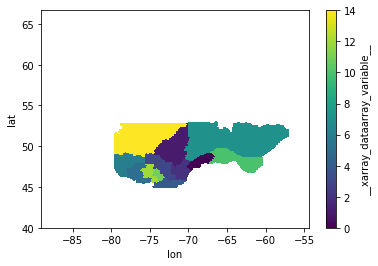

In [11]:
mask.plot()

# Subsetting arrays with Xclim

In [12]:
# Mapping data - 30 year means
tmp1 = dsEns.sel(time=(dsEns.time.dt.year>=1981))
window = 30
time1 = tmp1.time[0::window]

ds30yavg = tmp1.coarsen(time=window).mean()
ds30yavg['time'] = time1
perc30yavg = ens.ensemble_percentiles(ds30yavg)
perc30yavg # entire grid

# Mapping data

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 320, 416), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 320, 416), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 320, 416), meta=np.ndarray>

In [13]:
# select data for individual regions and create Dataframe
reg_ids = np.unique(mask.values)
reg_ids = reg_ids[np.where(~np.isnan(reg_ids))]
listRegions = []
for r in reg_ids:
    print(r)
    if ~np.isnan(r):
        reg = perc30yavg.where(mask==r, drop=True)
        print(reg)
        df = reg.drop('realization').to_dataframe().dropna()
        listRegions.append(df)
        # export ot netcdf?

0.0
<xarray.Dataset>
Dimensions:      (lat: 25, lon: 44, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -70.1293 -70.04597 ... -66.62944 -66.54611
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 49.12401 49.04068 48.95735 ... 47.20742 47.12409
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 25, 44), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 25, 44), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 25, 44), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



1.0
<xarray.Dataset>
Dimensions:      (lat: 65, lon: 56, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -74.37913 -74.2958 ... -69.87931 -69.79598
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 52.79053 52.7072 52.62387 ... 47.54074 47.45741
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 65, 56), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 65, 56), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 65, 56), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



2.0
<xarray.Dataset>
Dimensions:      (lat: 31, lon: 34, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -72.37921 -72.29588 ... -69.71265 -69.62932
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 48.29071 48.20738 48.12405 ... 45.87414 45.79081
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 31, 34), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 31, 34), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 31, 34), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



3.0
<xarray.Dataset>
Dimensions:      (lat: 42, lon: 49, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -75.46242 -75.37909 ... -71.54591 -71.46258
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 49.04068 48.95735 48.87402 ... 45.70748 45.62415
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 42, 49), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 42, 49), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 42, 49), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



4.0
<xarray.Dataset>
Dimensions:      (lat: 13, lon: 50, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -74.54579 -74.46246 ... -70.54595 -70.46262
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 46.0408 45.95747 45.87414 ... 45.12417 45.04084
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 13, 50), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 13, 50), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 13, 50), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



5.0
<xarray.Dataset>
Dimensions:      (lat: 31, lon: 39, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -77.87899 -77.79566 ... -74.79578 -74.71245
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 47.95739 47.87406 47.79073 ... 45.54082 45.45749
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 31, 39), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 31, 39), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 31, 39), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



6.0
<xarray.Dataset>
Dimensions:      (lat: 39, lon: 49, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -79.54559 -79.46226 ... -75.62908 -75.54575
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 49.45733 49.374 49.29067 ... 46.37412 46.29079
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 39, 49), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 39, 49), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 39, 49), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



7.0
<xarray.Dataset>
Dimensions:      (lat: 59, lon: 162, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -70.46262 -70.37929 ... -57.12982 -57.04649
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 52.95719 52.87386 52.79053 ... 48.20738 48.12405
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 59, 162), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 59, 162), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 59, 162), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



9.0
<xarray.Dataset>
Dimensions:      (lat: 1, lon: 1, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -78.71229
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 48.70736
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



10.0
<xarray.Dataset>
Dimensions:      (lat: 35, lon: 82, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -67.21275 -67.12942 ... -60.54635 -60.46302
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 49.70732 49.62399 49.54066 ... 46.95743 46.8741
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 35, 82), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 35, 82), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 35, 82), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



11.0
<xarray.Dataset>
Dimensions:      (lat: 19, lon: 21, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -74.62912 -74.54579 ... -73.04585 -72.96252
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 47.20742 47.12409 47.04076 ... 45.79081 45.70748
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 19, 21), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 19, 21), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 19, 21), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



12.0
<xarray.Dataset>
Dimensions:      (lat: 28, lon: 29, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -76.12906 -76.04573 ... -73.87915 -73.79582
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 47.7074 47.62407 47.54074 ... 45.54082 45.45749
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 28, 29), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 28, 29), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 28, 29), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



14.0
<xarray.Dataset>
Dimensions:      (lat: 51, lon: 112, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -79.46226 -79.37893 ... -70.29596 -70.21263
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 52.79053 52.7072 52.62387 ... 48.70736 48.62403
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 51, 112), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 51, 112), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 51, 112), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



## Example for Region 1

In [ ]:
Region1 = listRegions[1]
Region1i = Region1.reset_index()

In [ ]:
Region1i

## Merge data with polygons mask

In [ ]:
Region1poly = pd.merge(Region1i, dfpolyshape, on=["lat","lon"])
Region1poly

In [ ]:
gdf2050p1.to_file(tg['TER_GUIDE'].iloc[0]+"_2050_tg_mean_annual_rcp85_10.json", driver="GeoJSON"

### TODO: 

- Create "for loop" to create a DF for each group of regions
- Split by time period (3) - not necessary 
- Split by percentiles - not necessary 
- Merge with the poly DF to get all the rest of the data (notably names of the regions) - Not necessary, just add a column with the name? - MAKE A DICTIONARY
- Beware: find a way to merge, given that poly doesn't have lat long
- Beware: there's no region 8 and 13. They are too small
- Merge with polyshape to create geojson:

dfpolyshape = from_geofeather('Grid-TerritoiresGuides.feather')
dftg2050TGp1 = pd.merge(dfC12050, dfpolyshape, on=["lat","lon"])
dftg2050TGp1
for tg in listTG2050p1:
    geometry = tg["geometry"]
    crs = {'init': "epsg:4326"}
    gdf2050p1 = GeoDataFrame(tg, crs=crs, geometry=geometry)
    print (tg['TER_GUIDE'].iloc[0])
    gdf2050p1.to_file(tg['TER_GUIDE'].iloc[0]+"_2050_tg_mean_annual_rcp85_10.json", driver="GeoJSON")
    

In [ ]:
%time dfper = perctiles.to_dataframe().dropna()
dfper